In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [14]:
def check_df(dataframe, head):
    print("##################### Shape/Row and Column #####################")
    print(dataframe.shape)
    print("##################### Types/Data Types #####################")
    print(dataframe.dtypes)
    print("##################### Info/General Information of Columns #####################")
    print(dataframe.info())
    print("##################### Nunique/Unique Information of Columns #####################")
    print(dataframe.nunique())
    print("##################### Tail/Last n Rows #####################")
    print(dataframe.tail(head))
    print("##################### NA/Null Values #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles/Numerical Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [15]:
# Data Description
check_df(df, 3)

##################### Shape/Row and Column #####################
(569, 32)
##################### Types/Data Types #####################
id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst         

In [16]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [17]:
# importing libraries
import seaborn as sns
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split

#Fixings warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/breast-cancer1.csv")

In [27]:
# Separate features and target variable
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train models
models = {}

# Logistic Regression
models["Logistic Regression"] = LogisticRegression()
models["Logistic Regression"].fit(X_train, y_train)

# Naive Bayes Classifier
models["Naive Bayes"] = GaussianNB()
models["Naive Bayes"].fit(X_train, y_train)

# Decision Tree Classifier
models["Decision Tree"] = DecisionTreeClassifier(max_depth=5)
models["Decision Tree"].fit(X_train, y_train)

# KNN Classifier
models["KNN"] = KNeighborsClassifier(n_neighbors=5)
models["KNN"].fit(X_train, y_train)

# Random Forest Classifier
models["Random Forest"] = RandomForestClassifier(n_estimators=100)
models["Random Forest"].fit(X_train, y_train)

# Evaluate and compare models
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tPrecision: {precision:.4f}")
    print(f"\tRecall: {recall:.4f}")
    print(f"\tF1-score: {f1:.4f}")
    print("-" * 30)

Logistic Regression:
	Accuracy: 0.6228
	Precision: 0.0000
	Recall: 0.0000
	F1-score: 0.0000
------------------------------
Naive Bayes:
	Accuracy: 0.6140
	Precision: 0.0000
	Recall: 0.0000
	F1-score: 0.0000
------------------------------
Decision Tree:
	Accuracy: 0.9474
	Precision: 0.9302
	Recall: 0.9302
	F1-score: 0.9302
------------------------------
KNN:
	Accuracy: 0.7544
	Precision: 0.7419
	Recall: 0.5349
	F1-score: 0.6216
------------------------------
Random Forest:
	Accuracy: 0.9649
	Precision: 0.9756
	Recall: 0.9302
	F1-score: 0.9524
------------------------------


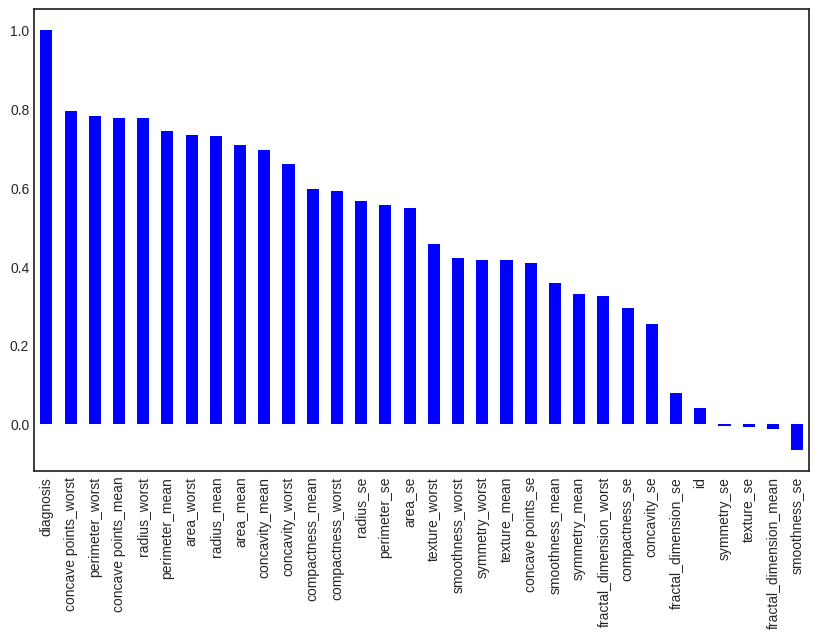

In [29]:
plt.figure(figsize=(10,6))
df.corr()['diagnosis'].sort_values(ascending = False).plot(kind='bar', color= 'blue')
plt.xticks(rotation=90);

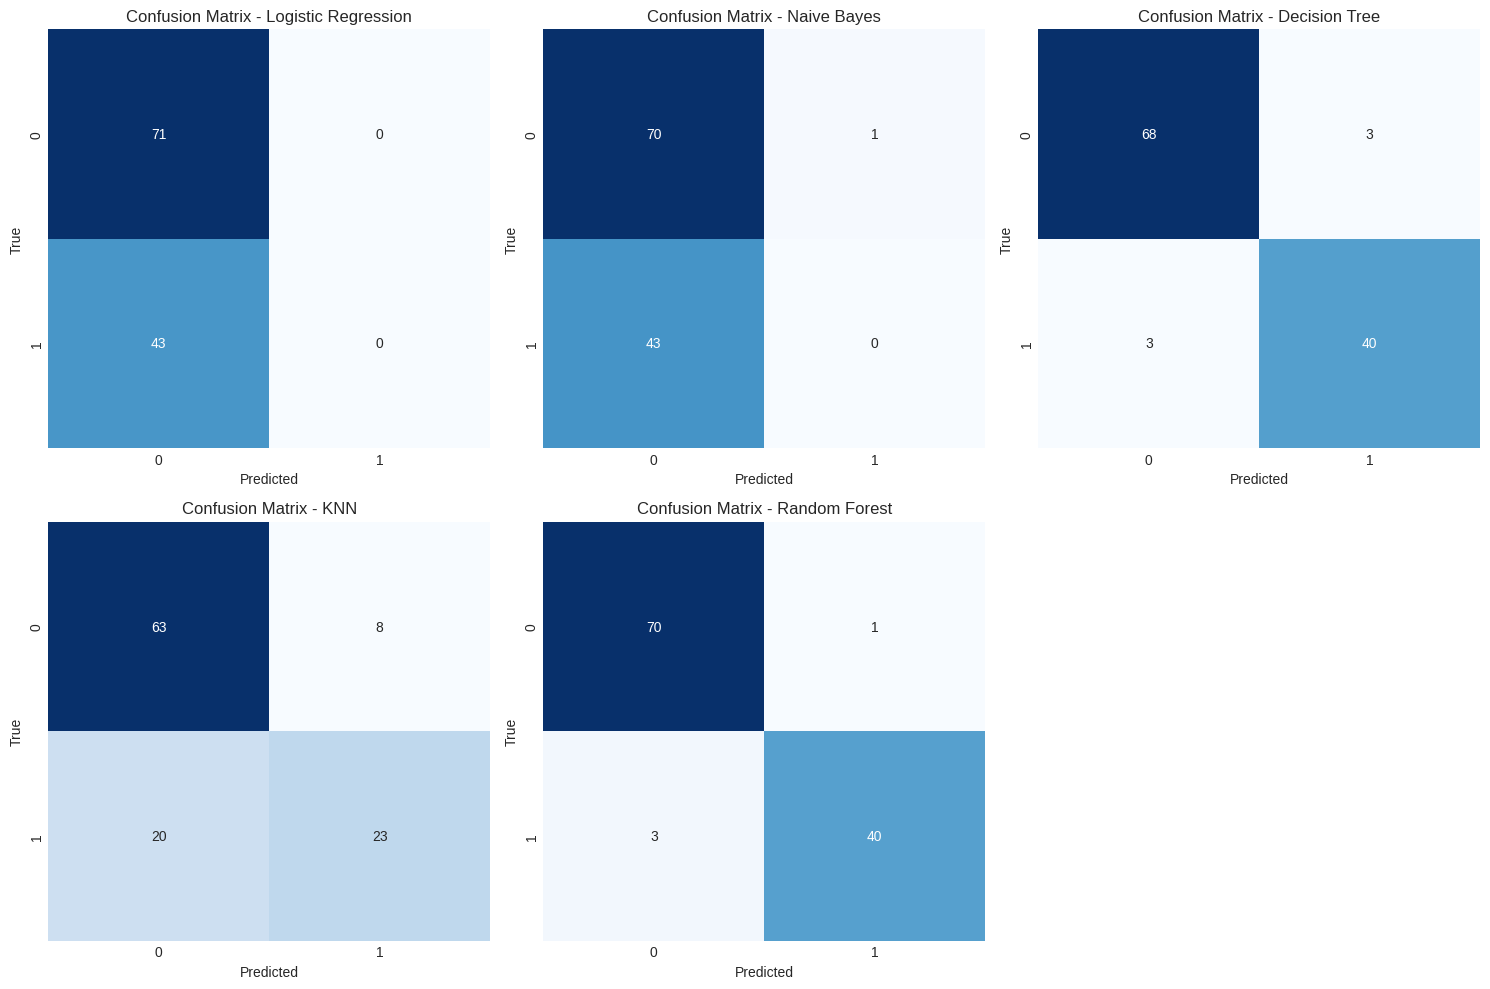

In [30]:
# Draw confusion matrices
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

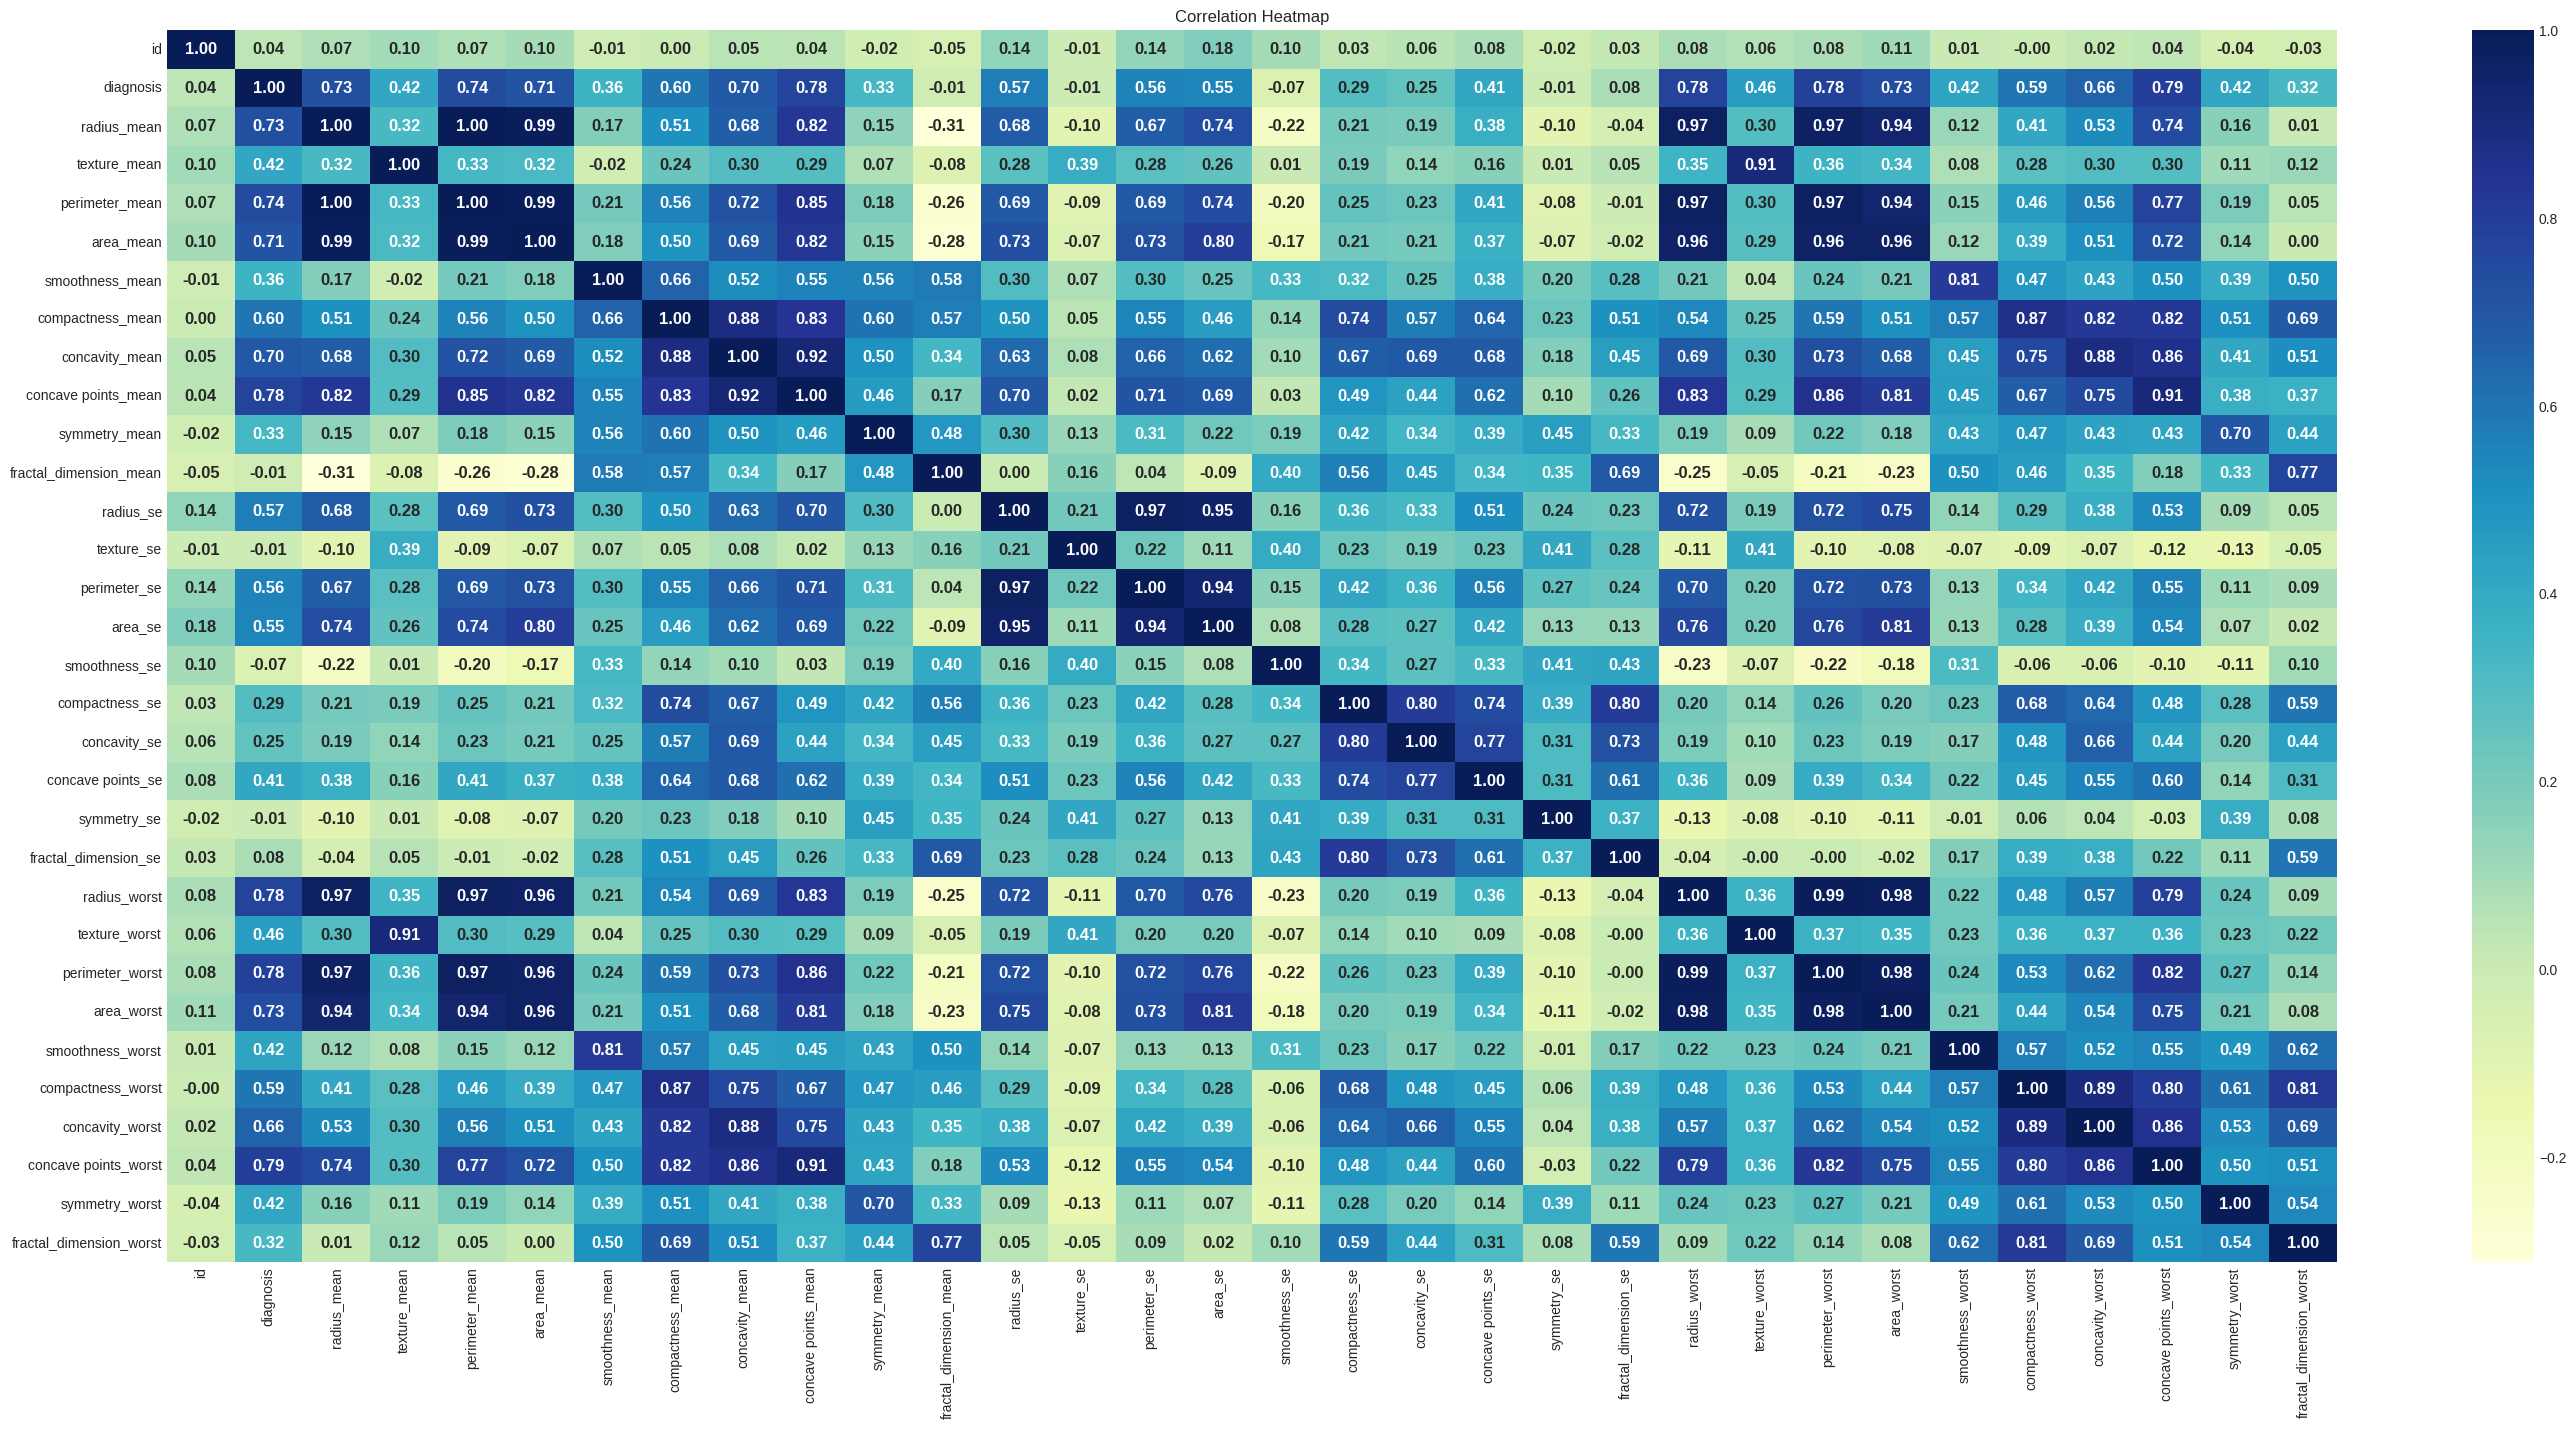

In [31]:
corr = df.corr()
plt.figure(figsize = (35,16))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu', fmt='.2f', annot_kws={'size': 12, 'fontweight': 'semibold'})
plt.title('Correlation Heatmap')

In [33]:
selected_columns = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",	"compactness_mean",	"concavity_mean",	"concave points_mean",	"symmetry_mean",
                    "fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se",
                    "radius_worst","texture_worst","perimeter_worst","area_worst",	"smoothness_worst",	"compactness_worst",	"concavity_worst",	"concave points_worst","symmetry_worst",	"ractal_dimension_worst"]

IndexError: index 5 is out of bounds for axis 0 with size 5

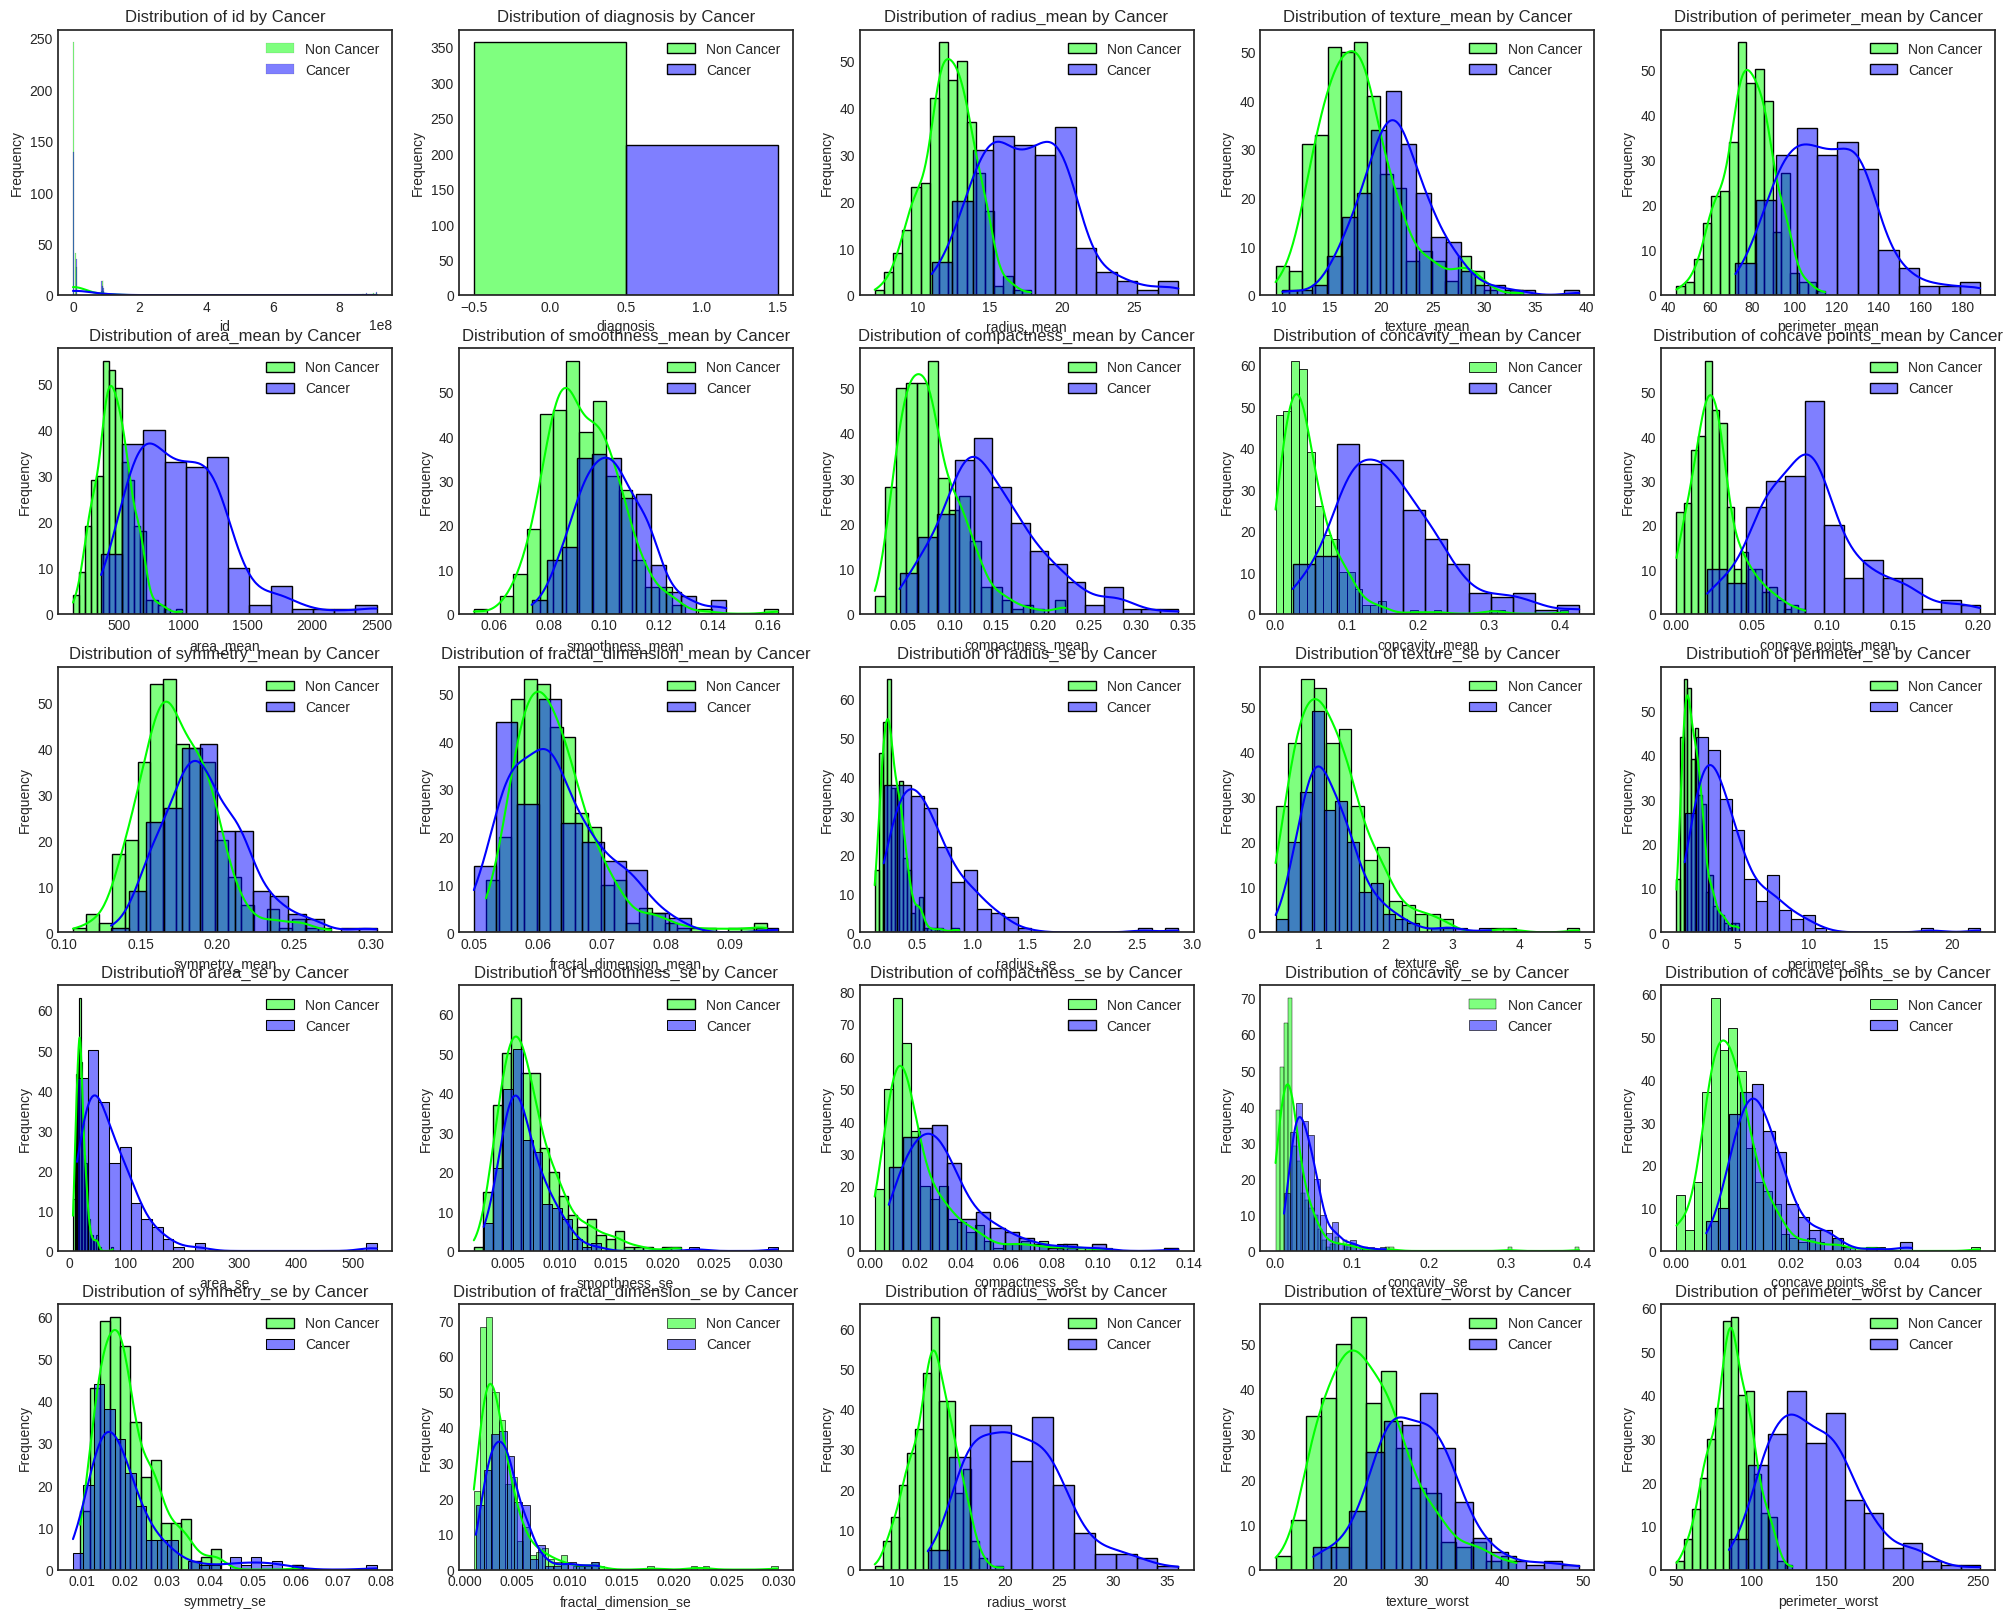

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 20))

for i in range(len(selected_columns)):
    row = i // 5
    col = i % 5

    sns.histplot(df[selected_columns[i]][(df['diagnosis'] == 0)], color="Lime", kde=True, ax=axes[row, col], label="Non Cancer")
    sns.histplot(df[selected_columns[i]][(df['diagnosis'] == 1)], color="Blue", kde=True, ax=axes[row, col], label="Cancer")

    axes[row, col].legend()
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xlabel(selected_columns[i])
    axes[row, col].set_title(f'Distribution of {selected_columns[i]} by Cancer')


plt.tight_layout()
plt.show()

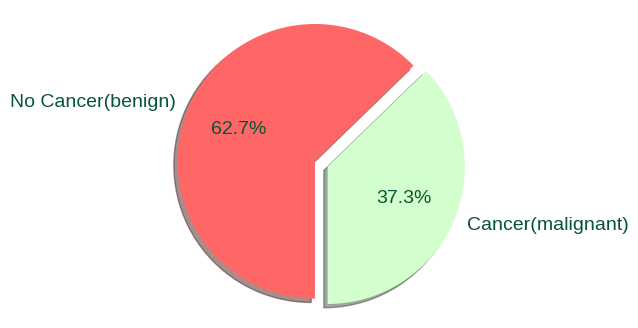

In [36]:
PCOS=df[df['diagnosis']==1].shape[0]
non_PCOS= df[df['diagnosis']==0].shape[0]

slices=[PCOS,non_PCOS]
labels=['Cancer(malignant)','No Cancer(benign)']
explode=[0.1,0]

colors = ['#d3ffce', '#ff6666']
#794044  #065535

fig1, ax1 = plt.subplots(figsize=(5, 4))
ax1.pie(slices, explode=explode,colors= colors, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270,textprops={'fontsize': 14,'color':"#065535"})
ax1.axis('equal')
plt.show()

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

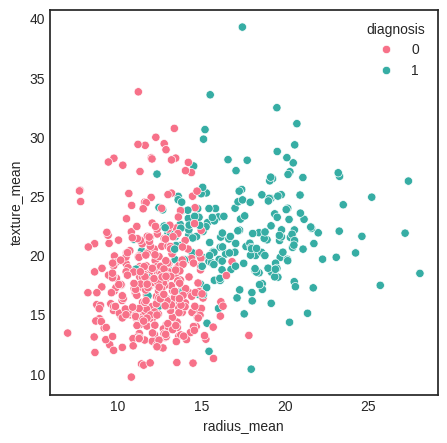

In [37]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="radius_mean", y="texture_mean", data=df, hue='diagnosis', palette='husl')